In [12]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    SGDClassifier
)

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier
)


from sklearn.cluster import KMeans

from sklearn.svm import (
    LinearSVC,
    SVC
)

from sklearn.metrics import (
    precision_recall_curve, 
    f1_score, 
    roc_curve,
    auc,
    precision_score,
    recall_score,
    mean_squared_error,
    confusion_matrix
)

# from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import collections
import re
import datetime
# from scipy.stats import pearsonr, interval
import scipy.stats as st
import os

from training import plot_auc_roc, plot_recision_recall_f1, plot_countbar, plot_diff_in_means, plot_cross_tab_heatmap, plot_predictions_by_scores, feature_engineering

In [2]:
list_of_file_names = []
for file in os.listdir('data_full_review_cleaned/'):
   if file.endswith(".pkl"):
      list_of_file_names.append(os.path.join(file))

In [3]:
list_of_file_names[0]

'KVD_Vegan_Beauty_Lock-It_Foundation.csv.pkl'

In [4]:
product = list_of_file_names[0].replace('.csv.pkl', '')

In [5]:
product

'KVD_Vegan_Beauty_Lock-It_Foundation'

In [6]:
test = feature_engineering(product_name = list_of_file_names[0])
test_train_X, test_val_X = test.feature_engineering()


In [7]:
logit = LogisticRegression(penalty='none',random_state=0, max_iter=1000).fit(test_train_X, test.train_y)

/opt/homebrew/Caskroom/miniforge/base/envs/foundation/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [8]:
sum(test.y) / len(test.data)

0.6413282656531306

In [9]:
predict_y = logit.predict_proba(test_val_X)[:, 1]

/opt/homebrew/Caskroom/miniforge/base/envs/foundation/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


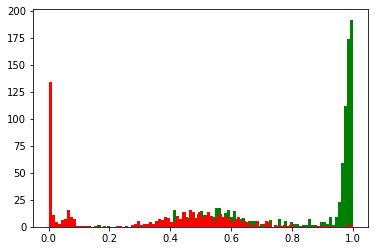

<Figure size 432x288 with 0 Axes>

In [10]:
plot_predictions_by_scores(predict_y, test.val_y, bins = 100, model = 'logit', product= product)

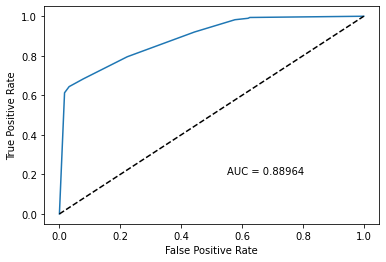

In [11]:
plot_auc_roc(predict_y, test.val_y, product = product, model = 'logit')

In [13]:
Bag = BaggingClassifier(n_estimators=1000, random_state=0).fit(test_train_X, test.train_y)
predict_y = Bag.predict_proba(test_val_X)[:, 1]

/opt/homebrew/Caskroom/miniforge/base/envs/foundation/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/foundation/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


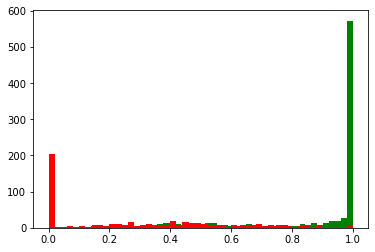

<Figure size 432x288 with 0 Axes>

In [15]:
plot_predictions_by_scores(predict_y, test.val_y, bins = 50, model = 'bagging', product= product)

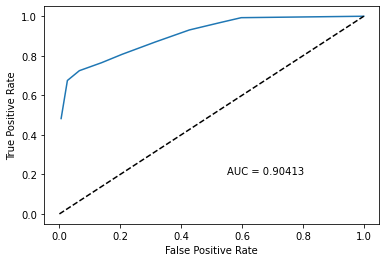

In [16]:
plot_auc_roc(predict_y, test.val_y, product = product, model = 'bagging')